<a href="https://colab.research.google.com/github/Demon-Sheriff/Linear-Alg_ML_fs/blob/master/KNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [178]:
!gdown 1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2

Downloading...
From: https://drive.google.com/uc?id=1ZdhRqYv-JizWV6DxO6C4R_k1kxPhmlF2
To: /content/multiclass.csv
100% 14.6k/14.6k [00:00<00:00, 33.0MB/s]


In [179]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [180]:
path = '/content/multiclass.csv'

data = pd.read_csv(path)

In [181]:
data.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


In [182]:
X, y = data.drop(columns=['class']), data['class']

In [183]:
X

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [184]:
y

,class
0,2
1,2
2,2
3,1
4,1
...,...
435,2
436,2
437,2
438,3


<Axes: xlabel='class', ylabel='Count'>

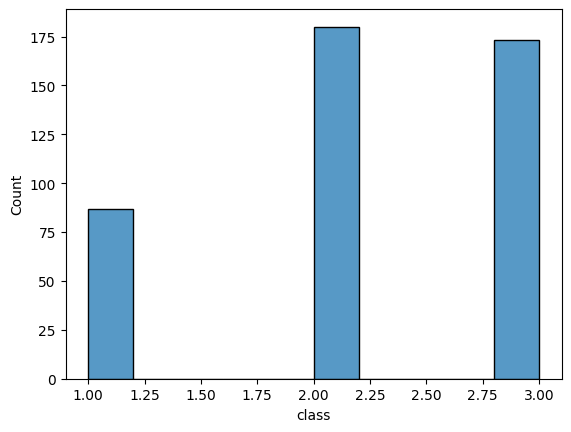

In [185]:
sns.histplot(data = data['class'])

In [186]:
np.sum(y - 1)

526

In [187]:
np.sum(y)

966

In [188]:
temp = data[['Milk', 'Frozen']]

In [189]:
temp

,Milk,Frozen
0,9656,214
1,9810,1762
2,8808,2405
3,1196,6404
4,5410,3915
...,...,...
435,12051,13135
436,1431,4510
437,15488,437
438,1981,1038


In [190]:
dp = np.array([1, 1, 1])

In [191]:
data_2 = {
    'A': [1, 2, 3, 4],
    'B': [5, 6, 7, 8],
    'C': [9, 10, 11, 12]
}

df = pd.DataFrame(data_2)

lbls = np.array([1, 1, 2, 2])

In [192]:
df, lbls

(   A  B   C
 0  1  5   9
 1  2  6  10
 2  3  7  11
 3  4  8  12,
 array([1, 1, 2, 2]))

In [193]:
(df - dp) ** 2

,A,B,C
0,0,16,64
1,1,25,81
2,4,36,100
3,9,49,121


In [194]:
np.sum((df - dp) ** 2, axis = 1)

,0
0,80
1,107
2,140
3,179


In [195]:
distances = np.sqrt(np.sum((df - dp) ** 2, axis = 1))

In [196]:
# np.concatenate((distances, lbls), axis=1)
maps = list(zip(distances, lbls))
maps[0]

(8.94427190999916, 1)

In [197]:
distances.sort_values(inplace=True)

In [198]:
distances

,0
0,8.944272
1,10.344080
2,11.832160
3,13.379088


In [199]:
def KNN(X, y, point, k=5):

  # get the euclidean distance
  dist = np.sqrt(np.sum((X - point) ** 2, axis = 1))

  # map the distances with the labels
  maps = list(zip(dist, y))

  # sort the maps based on the distances
  maps.sort(key=lambda x: x[0])

  # get the k nearest neighbors
  neighbors = maps[:k]

  return neighbors

In [200]:
data.isna().sum().T

,0
Region,0
Fresh,0
Milk,0
Grocery,0
Frozen,0
Detergents_Paper,0
Delicassen,0
class,0


In [201]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

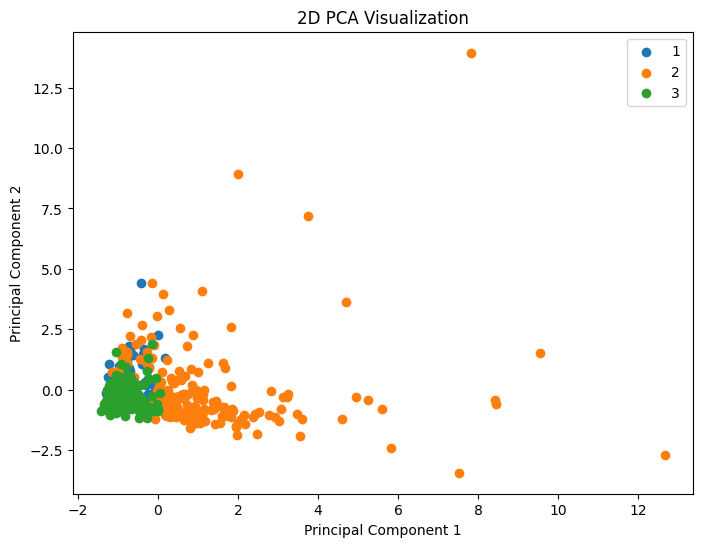

In [218]:
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
for class_id in np.unique(y):
    plt.scatter(
        X_pca[y == class_id, 0],
        X_pca[y == class_id, 1],
        label=class_id
    )
plt.title("2D PCA Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

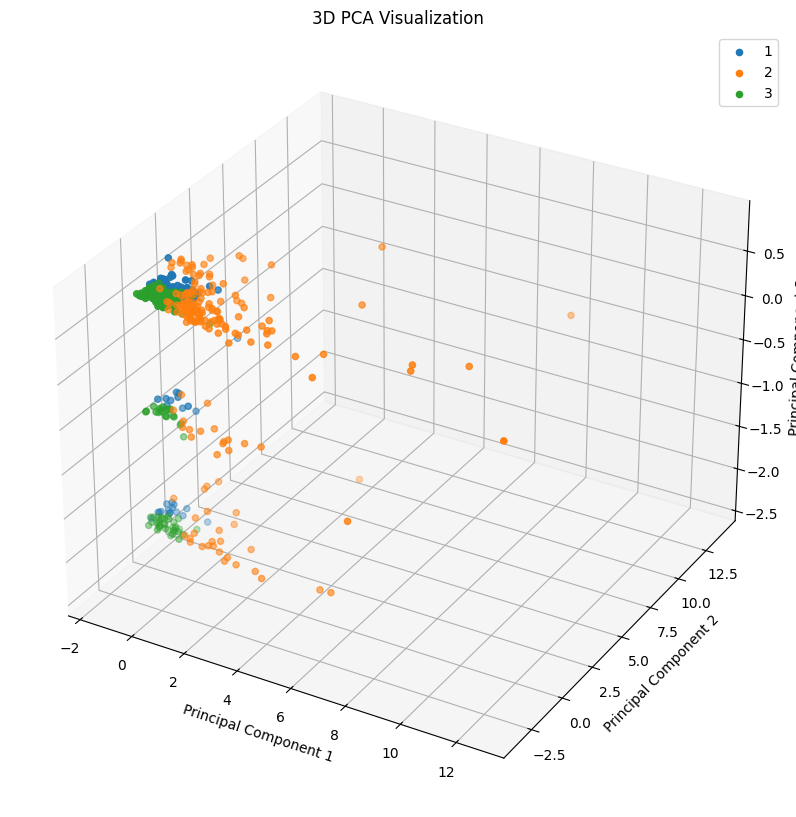

In [217]:
from mpl_toolkits.mplot3d import Axes3D

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

fig = plt.figure(figsize=(10, 15))
ax = fig.add_subplot(111, projection='3d')
for class_id in np.unique(y):
    ax.scatter(
        X_pca_3d[y == class_id, 0],
        X_pca_3d[y == class_id, 1],
        X_pca_3d[y == class_id, 2],
        label=class_id
    )
ax.set_title("3D PCA Visualization")
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
plt.legend()
plt.show()

In [203]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_resample(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [204]:
def predict(model, X_test):

  predictions = []
  for query_point in X_test:
    neighbours = model(X_sm, y_sm, query_point, k=5)
    top_k_labels = [label for _, label in neighbours]
    predicted_label = max(set(top_k_labels), key=top_k_labels.count)
    predictions.append(predicted_label)

  return predictions

In [205]:
y_pred = predict(KNN, X_test)

In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, precision_score, recall_score, f1_score, accuracy_score, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.67      0.75      0.71        16
           2       0.91      0.79      0.85        39
           3       0.89      0.97      0.93        33

    accuracy                           0.85        88
   macro avg       0.82      0.84      0.83        88
weighted avg       0.86      0.85      0.85        88



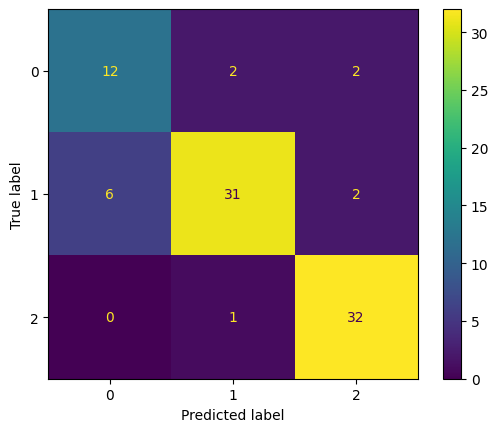

In [213]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [214]:
# using sklearn's KNN
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [215]:
y_pred_sk = knn.predict(X_test)

In [221]:
sk_classification_report = classification_report(y_test, y_pred_sk)
print(sk_classification_report)

              precision    recall  f1-score   support

           1       0.75      0.75      0.75        16
           2       0.92      0.85      0.88        39
           3       0.89      0.97      0.93        33

    accuracy                           0.88        88
   macro avg       0.85      0.86      0.85        88
weighted avg       0.88      0.88      0.87        88



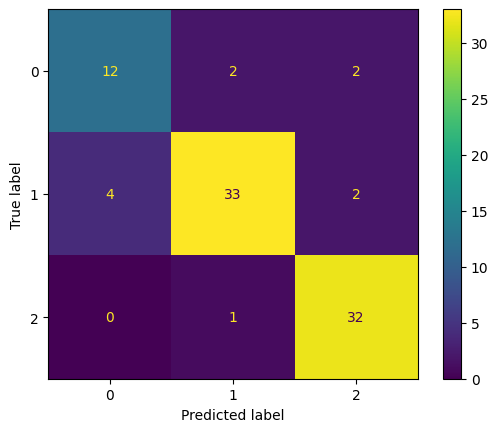

In [222]:
sk_cm = confusion_matrix(y_test, y_pred_sk)
sk_disp = ConfusionMatrixDisplay(confusion_matrix=sk_cm)
sk_disp.plot()